## The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Preprocessing

In [7]:
#check for null values:
df.isna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()
# here there is no null values in the data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
# to see the correlation we can go for corr():
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

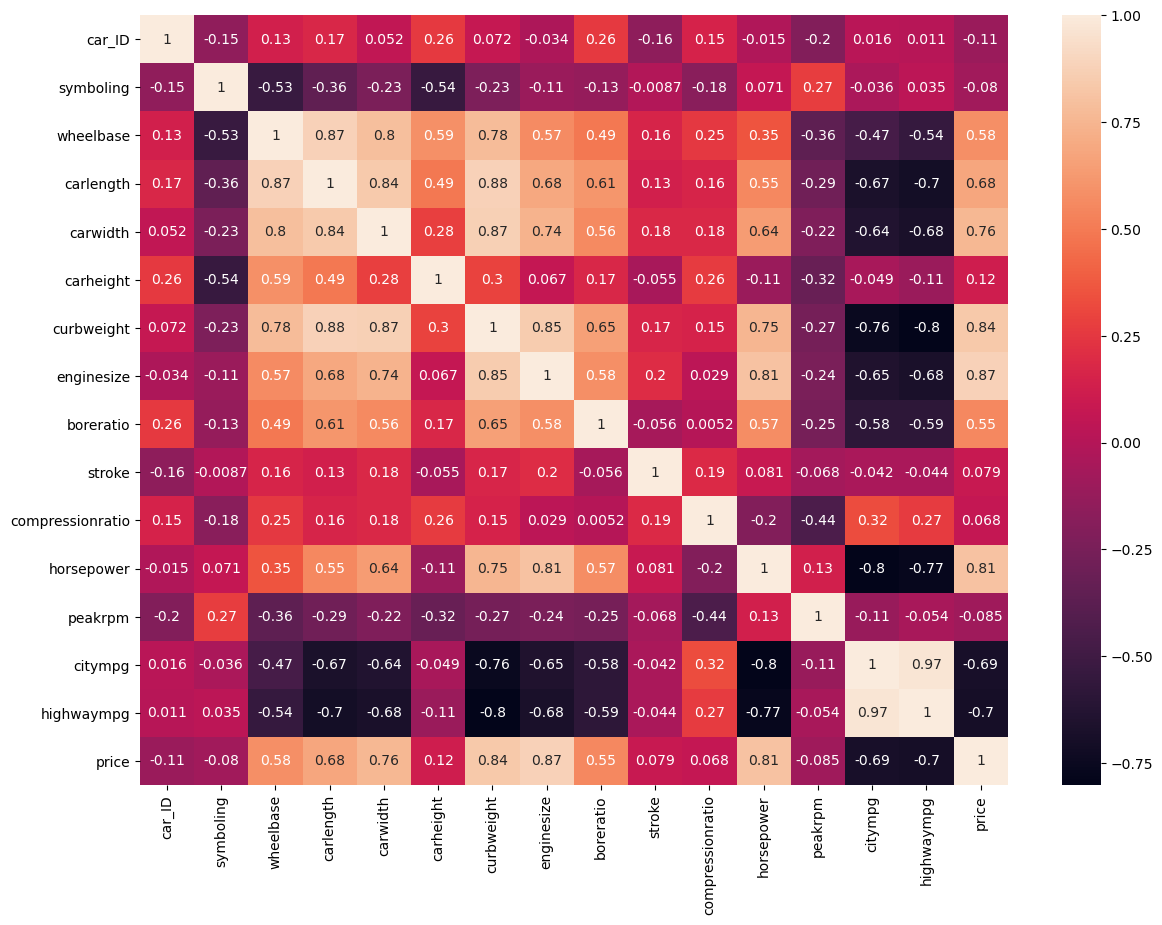

In [11]:
#create heatemap for the correlation:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [12]:
#through heatmap we got to know which columns are more correlated with the price as we are creating a model to predict the price:
#Columns : 'wheelbase', 'carlength', 'carwidth', 'enginesize', 'curbweight', 'boreratio', 'horsepower'
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


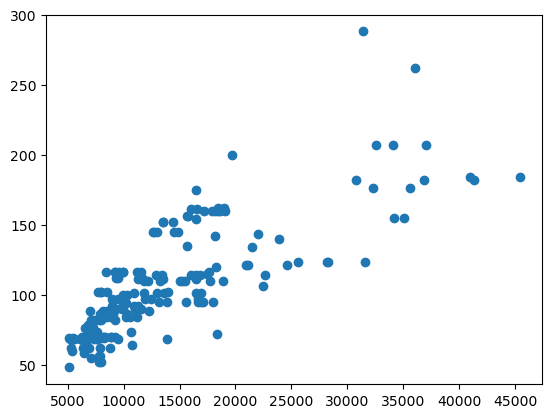

In [13]:
# lets see the replation between price and horsepower
plt.scatter(df['price'], df['horsepower'])

In [86]:
#now we will drop the columns which are not important for the analysis :
''' 'car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price' '''


" 'car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',\n       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',\n       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',\n       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',\n       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',\n       'price' "

In [14]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
df.shape

(205, 26)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [17]:
x=df[['wheelbase', 'carlength', 'carwidth', 'enginesize', 'curbweight', 'boreratio', 'horsepower']]
y=df['price']

In [18]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [19]:
#now split the dataset:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=42)

In [20]:
len(x_train)

143

In [21]:
len(y_train)

143

In [22]:
len(x_test)

62

In [23]:
len(y_test)

62

In [24]:
len(df)

205

## Linear Clasiffication:

In [25]:
lrm=LinearRegression()

In [26]:
lrm.fit(x_train,y_train)

LinearRegression()

In [27]:
prediction_LR=lrm.predict(x_test)

In [28]:
y_test.reset_index(drop=True, inplace=True)
y_test

0     30760.000
1     17859.167
2      9549.000
3     11850.000
4     28248.000
        ...    
57    11845.000
58    37028.000
59     5389.000
60     9233.000
61    17199.000
Name: price, Length: 62, dtype: float64

In [29]:
lrm.score(x_test,y_test)

0.7783110691708663

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [31]:
#print(accuracy_score(prediction_LR,y_test))
#If you're working with a regression problem and you want to measure the model's performance, 
#you should use a regression metric such as Mean Absolute Error (MAE), Mean Squared Error (MSE), 
#Root Mean Squared Error (RMSE), or R-squared (R^2) instead of accuracy.
mae = mean_absolute_error(y_test, prediction_LR)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2668.665515001681


## Decision Tree

In [32]:
tr=DecisionTreeRegressor()
tr.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
prediction_tr=tr.predict(x_test)

In [34]:
y_test

0     30760.000
1     17859.167
2      9549.000
3     11850.000
4     28248.000
        ...    
57    11845.000
58    37028.000
59     5389.000
60     9233.000
61    17199.000
Name: price, Length: 62, dtype: float64

In [35]:
y_test

0     30760.000
1     17859.167
2      9549.000
3     11850.000
4     28248.000
        ...    
57    11845.000
58    37028.000
59     5389.000
60     9233.000
61    17199.000
Name: price, Length: 62, dtype: float64

In [36]:
x_train

,wheelbase,carlength,carwidth,enginesize,curbweight,boreratio,horsepower
177,102.4,175.6,66.5,122,2458,3.31,92
75,102.7,178.4,68.0,140,2910,3.78,175
174,102.4,175.6,66.5,110,2480,3.27,73
31,86.6,144.6,63.9,92,1819,2.91,76
12,101.2,176.8,64.8,164,2710,3.31,121
...,...,...,...,...,...,...,...
106,99.2,178.5,67.9,181,3139,3.43,160
14,103.5,189.0,66.9,164,3055,3.31,121
92,94.5,165.3,63.8,97,1938,3.15,69
179,102.9,183.5,67.7,171,3016,3.27,161


In [37]:
new_data = pd.DataFrame([[102.4, 175.6, 66.5, 122, 2458, 3.31, 92]], columns=['wheelbase', 'carlength', 'carwidth', 'enginesize', 'curbweight', 'boreratio', 'horsepower'])

In [38]:
tr.predict(new_data)

array([11248.])

In [39]:
'''
how to convert categorical data into numeric data : pd.factoriae(df.column)[0]
   second method : sklearn.preprocessing import LabelEncoder
   lr=labelEncoder()
   df['code_le']=le.fit_transform(iris.species)
   
columns=['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'carheight', 'enginetype', 'cylindernumber', 'fuelsystem', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg']
'''
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fueltype_new']=le.fit_transform(df.fueltype)

In [40]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [41]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [42]:
df['enginelocation_new']=le.fit_transform(df.enginelocation)

In [43]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [44]:
df['fuelsystem_new']=le.fit_transform(df.fuelsystem)

In [45]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [46]:
df['drivewheel_new']=le.fit_transform(df.drivewheel)

In [47]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [48]:
df['carbody_new']=le.fit_transform(df.carbody)

In [49]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [50]:
df['doornumber_new']=le.fit_transform(df.doornumber)

In [51]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,fueltype_new,enginelocation_new,fuelsystem_new,drivewheel_new,carbody_new,doornumber_new
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,13495.0,1,0,5,2,0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,16500.0,1,0,5,2,0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,5000,19,26,16500.0,1,0,5,2,2,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,5500,24,30,13950.0,1,0,5,1,3,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,5500,18,22,17450.0,1,0,5,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,5400,23,28,16845.0,1,0,5,2,3,0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,5300,19,25,19045.0,1,0,5,2,3,0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,5500,18,23,21485.0,1,0,5,2,3,0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,4800,26,27,22470.0,0,0,3,2,3,0


In [53]:
df['symboling'].unique()
df['symboling_new']=le.fit_transform(df.symboling)


In [57]:
X=df[['wheelbase', 'carlength', 'carwidth', 'enginesize', 'curbweight', 'boreratio', 'horsepower', 'symboling_new', 'aspiration_new', 'doornumber_new', 'fueltype_new', 'carbody_new', 'drivewheel_new', 'enginelocation_new', 'fuelsystem_new' ]]

In [55]:
df['aspiration'].unique()
df['aspiration_new']=le.fit_transform(df.aspiration)

In [58]:
X

,wheelbase,carlength,carwidth,enginesize,curbweight,boreratio,horsepower,symboling_new,aspiration_new,doornumber_new,fueltype_new,carbody_new,drivewheel_new,enginelocation_new,fuelsystem_new
0,88.6,168.8,64.1,130,2548,3.47,111,5,0,1,1,0,2,0,5
1,88.6,168.8,64.1,130,2548,3.47,111,5,0,1,1,0,2,0,5
2,94.5,171.2,65.5,152,2823,2.68,154,3,0,1,1,2,2,0,5
3,99.8,176.6,66.2,109,2337,3.19,102,4,0,0,1,3,1,0,5
4,99.4,176.6,66.4,136,2824,3.19,115,4,0,0,1,3,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,141,2952,3.78,114,1,0,0,1,3,2,0,5
201,109.1,188.8,68.8,141,3049,3.78,160,1,1,0,1,3,2,0,5
202,109.1,188.8,68.9,173,3012,3.58,134,1,0,0,1,3,2,0,5
203,109.1,188.8,68.9,145,3217,3.01,106,1,1,0,0,3,2,0,3


In [59]:
Y=df['price']

In [60]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [95]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=.20, random_state=5)

In [96]:
X_train

,wheelbase,carlength,carwidth,enginesize,curbweight,boreratio,horsepower,symboling_new,aspiration_new,doornumber_new,fueltype_new,carbody_new,drivewheel_new,enginelocation_new,fuelsystem_new
46,96.0,172.6,65.2,119,2734,3.43,90,4,0,1,1,2,2,0,7
183,97.3,171.7,65.5,109,2209,3.19,85,4,0,1,1,3,1,0,5
98,95.1,162.4,63.8,97,2008,3.15,69,4,0,1,1,1,1,0,1
197,104.3,188.8,67.2,141,3042,3.78,114,1,0,0,1,4,2,0,5
101,100.4,181.7,66.5,181,3095,3.43,152,2,0,0,1,3,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,120.9,208.1,71.7,308,3900,3.80,184,2,0,0,1,3,2,0,5
144,97.0,172.0,65.4,108,2385,3.62,82,2,0,0,1,3,0,0,1
118,93.7,157.3,63.8,90,1918,2.97,68,3,0,1,1,2,1,0,1
189,94.5,159.3,64.2,109,2254,3.19,90,5,0,1,1,0,1,0,5


In [97]:
Y_train

46     11048.0
183     7975.0
98      8249.0
197    16515.0
101    13499.0
        ...   
73     40960.0
144     9233.0
118     5572.0
189    11595.0
99      8949.0
Name: price, Length: 164, dtype: float64

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [99]:
lr.fit(X_train,Y_train)

LinearRegression()

In [100]:
model_prediction=lr.predict(X_test)

In [101]:
checking_model=pd.DataFrame([[104.9, 175.0, 66.1, 134, 2700, 3.43, 72, 2,0, 0, 0, 3, 2, 0, 3]], columns= ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'curbweight', 'boreratio', 'horsepower', 'symboling_new', 'aspiration_new', 'doornumber_new', 'fueltype_new', 'carbody_new', 'drivewheel_new', 'enginelocation_new', 'fuelsystem_new'])

In [102]:
lr.predict(checking_model)

array([14636.42931049])

In [103]:
lr.score(X_test,Y_test)

0.9327524864641694

In [104]:
for i in range(100):
    X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    model_prediction=lr.predict(X_test)
    r2_score(Y_test, model_prediction)
    lr.score(X_test,Y_test)

In [105]:
r2_score(Y_test, model_prediction)


0.8442048889305338

In [106]:
lr.score(X_test,Y_test)

0.8442048889305338

## to see the best score:

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

best_random_state = None
max_r2_score = -float('inf')  # Initialize with negative infinity to ensure any score is an improvement

for i in range(100):
    X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=.20, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    model_prediction = lr.predict(X_test)
    
    # Calculate the R-squared score for the current random_state
    r2 = r2_score(Y_test, model_prediction)
    
    # Check if the current R-squared score is the highest so far
    if r2 > max_r2_score:
        max_r2_score = r2
        best_random_state = i

print("Best random_state:", best_random_state)
print("Max R-squared Score:", max_r2_score)


Best random_state: 5
Max R-squared Score: 0.9327524864641694
